In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
import glob

In [14]:
## uni = file name
uni = "pid"

path = "/home/chyoo/work/KNO_reconstruction/KNO_pid/result/*" + uni +"*/train.csv"
train_path = glob.glob(path)
train_list = [file for file in train_path if file.endswith(".csv")]

In [15]:
for i in range(len(train_list)):
    print(np.sort(np.array(train_list))[i].split('/')[-2])

khu_pid_elec1_gamma0
khu_pid_elec1_mu0


In [16]:
# train_list = ['/home/chyoo/work/KNO_reconstruction/KNO_vertex/result/20240117_500_1000pmt_sakerv3/train.csv',
#  '/home/chyoo/work/KNO_reconstruction/KNO_vertex/result/20240117_500_200pmt_sakerv3/train.csv',
#  '/home/chyoo/work/KNO_reconstruction/KNO_vertex/result/20240117_500_200pmt_sakerv3_deep/train.csv',

#  '/home/chyoo/work/KNO_VRDL/result/20231013_KNO_sort200_SAVR2_posembedding_pos/train.csv',
#  '/home/chyoo/work/KNO_VRDL/result/20231109_200_200_SAVER_v2_test_many_fea/train.csv',
#  '/home/chyoo/work/KNO_VRDL/result/20231109_200_SAVER_v3_test_many_fea/train.csv',
# '/home/chyoo/work/KNO_VRDL/result/20240109_vertexrecon_mu_100_1000_sort/train.csv',
#  '/home/chyoo/work/KNO_VRDL/result/20240109_vertexrecon_config_KNO_ele_500_sort1000_more1500_SAVR_batch_v1/train.csv',
#  '/home/chyoo/work/KNO_VRDL/result/20240109_vertexrecon_config_KNO_ele_100_1000_sort_re_SAVR_batch_v1/train.csv']

0 20  /  MTL = 0.6941975  /  MTL epoch = 0000  /  0.6924826  /  ACC = 0.4819243714116016  /  khu_pid_elec1_mu0
1 24  /  MTL = 0.6938794  /  MTL epoch = 0001  /  0.6931290  /  ACC = 0.4970429020015797  /  khu_pid_elec1_gamma0


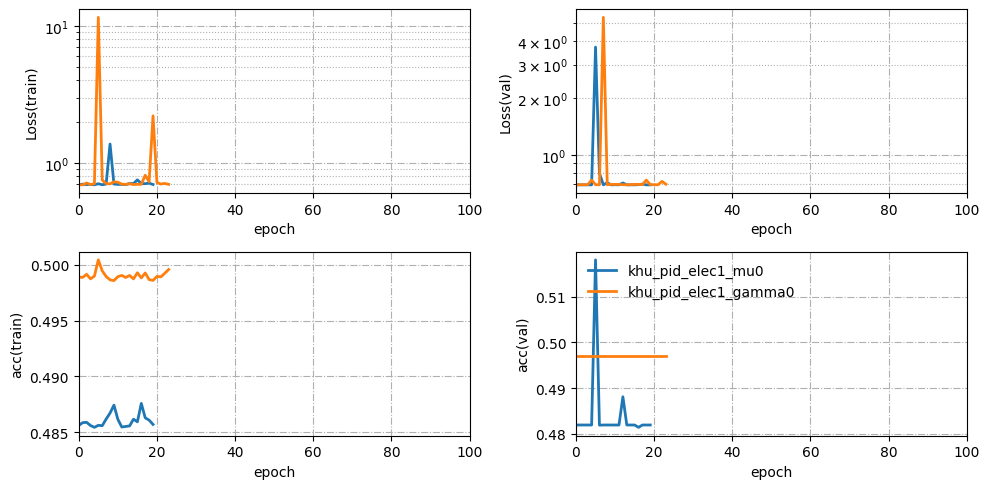

In [17]:
plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['lines.markersize'] = 5
plt.rcParams["legend.loc"] = 'upper right'
plt.rcParams["legend.frameon"] = False
plt.rcParams["legend.loc"] = 'upper left'

ax1 = plt.subplot(2, 2, 1, yscale='log', ylabel='Loss(train)', xlabel='epoch')
ax2 = plt.subplot(2, 2, 2, yscale='log', ylabel='Loss(val)', xlabel='epoch')
ax3 = plt.subplot(2, 2, 3, ylabel='acc(train)', xlabel='epoch')
ax4 = plt.subplot(2, 2, 4, ylabel='acc(val)', xlabel='epoch')

for ax in (ax1, ax2,ax3,ax4):
    ax.grid(which='major', axis='both', linestyle='-.')
    ax.grid(which='minor', linestyle=':')
    ax.set_xlim([0,100])

lines, labels = [], []

for i in range(len(train_list)):
    df = pd.read_csv(train_list[i])

    label = train_list[i]
    l =  ax1.plot(df['loss'], linewidth=2,label=label.split('/')[-2]) 
    ax2.plot(df['val_loss'], linewidth=2,label=label.split('/')[-2])
    ax3.plot(df['acc'], linewidth=2,label=label.split('/')[-2])
    ax4.plot(df['val_acc'], linewidth=2,label=label.split('/')[-2])
   
    print(i,
          len(df['loss']),
          ' / ',
          "MTL = " + f"{df['loss'].min():.7f}",
          " / ",
          "MTL epoch = " + str("{:04}".format(np.where(df['loss']==df['loss'].min())[0][0])),
          " / ",
          f"{df['val_loss'].min():.7f}",
          " / ",
          "ACC = " + str("{:04}".format(df['val_acc'][np.where(df['val_loss']==df['val_loss'].min())[0][0]])),
          " / ",
          
          label.split('/')[-2])

    lines.append(l[0])
    labels.append(label)
plt.tight_layout()
# plt.savefig('acc_loss.png',dpi=300)
plt.legend()
plt.show()
plt.close()

In [18]:
!pwd

/home/chyoo/work/KNO_reconstruction/KNO_pid
